In [1]:
# import Denpendencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Extraction Phase

#### The raw data is obtained from home credit default risk. Its source link is available in reference. This data has six tables which are cleaned step by step.

## Transformation Phase

### Raw Data Importing for cleaning

In [2]:
# Dictionary to hold file names and their paths
file_paths = {
    'application_train': '../Resources/application_train.csv',
    'bureau': '../Resources/bureau.csv',
    'bureau_balance': '../Resources/bureau_balance.csv',
    'credit_card_balance': '../Resources/credit_card_balance.csv',
    'POS_CASH_balance': '../Resources/POS_CASH_balance.csv',
    'previous_application': '../Resources/previous_application.csv',
    'installments_payments': '../Resources/installments_payments.csv'
}

# Dictionary to hold the loaded data
data_frames = {}

# Loop through the file_paths dictionary to load each file
for file_name, relative_path in file_paths.items():
    # Construct the absolute path
    file_path = os.path.abspath(relative_path)
    
    # Attempt to load the CSV file into a DataFrame
    try:
        data_frames[file_name] = pd.read_csv(file_path)
        print(f"{file_name} data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred while loading {file_name}: {e}")



application_train data loaded successfully!
bureau data loaded successfully!
bureau_balance data loaded successfully!
credit_card_balance data loaded successfully!
POS_CASH_balance data loaded successfully!
previous_application data loaded successfully!
installments_payments data loaded successfully!


In [5]:
# View the  top 10 rows of data
application_train_df = data_frames['application_train']
application_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check the shape of table
print(application_train_df.shape)

(307511, 122)


In [6]:
# Select numerical columns
numerical_columns = application_train_df.select_dtypes(include=['number'])
# Print or use the separated data
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           

In [7]:
# Select categorical columns
categorical_columns = application_train_df.select_dtypes(include=['object', 'category'])
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / 

In [8]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = application_train_df.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = application_train_df['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = application_train_df.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = application_train_df['SK_ID_CURR']

# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)


SK_ID_CURR along with Numerical Columns:
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS

In [9]:
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied              

In [9]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower seconda

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

occupation type has 96391 ,FONDKAPREMONT_MODE 210295,HOUSETYPE_MODE 154297,WALLSMATERIAL_MODE 154297,EMERGENCYSTATE_MODE 145755

In [10]:
print(numerical_and_id.shape)

(307511, 106)


In [11]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64


AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13673, dtype: int64
AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: count, Length: 1003, dtyp

In [12]:
numerical_and_id= numerical_and_id.fillna(0)

In [13]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: 

In [14]:
merge_data = pd.merge(numerical_and_id,categorical_and_id,on="SK_ID_CURR")

In [15]:
print(merge_data)

        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351

In [16]:
print(merge_data.shape)

(307511, 122)


In [35]:
# Assuming 'merge_data' is your DataFrame with missing values

# Identify columns with missing categorical values
categorical_columns_with_missing = merge_data.select_dtypes(include='object').columns[merge_data.select_dtypes(include='object').isnull().any()]

# Create a copy of the DataFrame
df_filled = merge_data.copy()

# Iterate over each column with missing categorical values
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col}")

    # Create a mask for missing values
    missing_mask = df_filled[col].isnull()

    # Split the data into known and unknown samples
    known_samples = df_filled[~missing_mask]
    unknown_samples = df_filled[missing_mask]

    # Drop the target column from known samples
    X_known = known_samples.drop(columns=[col])
    y_known = known_samples[col]

    # Create a preprocessor for numerical and categorical columns
    numerical_features = X_known.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_known.select_dtypes(include='object').columns

    numerical_transformer = SimpleImputer(strategy='mean')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create and fit the classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    clf.fit(X_known, y_known)

    # Predict missing values for unknown samples
    X_unknown = unknown_samples.drop(columns=[col])
    y_unknown_predicted = clf.predict(X_unknown)

    # Fill missing values in the original DataFrame
    df_filled.loc[missing_mask, col] = y_unknown_predicted

    print(f"Filled {sum(missing_mask)} missing values for {col}")

    # Check if there are still NaN values after imputation
    nan_columns = df_filled.columns[df_filled.isnull().any()]
    if nan_columns.any():
        print(f"NaN values still present after imputation in columns: {nan_columns}")

# Ensure there are no missing values left
print("Number of missing values after filling:", df_filled.isnull().sum().sum())

# Now df_filled should have no missing categorical values


Filling missing values for NAME_TYPE_SUITE
Filled 1292 missing values for NAME_TYPE_SUITE
NaN values still present after imputation in columns: Index(['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Filling missing values for OCCUPATION_TYPE
Filled 96391 missing values for OCCUPATION_TYPE
NaN values still present after imputation in columns: Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')
Filling missing values for FONDKAPREMONT_MODE
Filled 210295 missing values for FONDKAPREMONT_MODE
NaN values still present after imputation in columns: Index(['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')
Filling missing values for HOUSETYPE_MODE
Filled 154297 missing values for HOUSETYPE_MODE
NaN values still present after imputation in columns: Index(['WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='objec

In [54]:
df_filled.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Wooden,No
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Wooden,No
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Wooden,No


In [56]:
clean_output = df_filled.to_csv('cleaned.csv')

In [57]:
data_cleaned = pd.read_csv('cleaned.csv')
data_cleaned

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Wooden,No
3,3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,...,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Wooden,No
4,4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,...,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Wooden,No


In [32]:
bureau_data = data_frames['bureau']
bureau_data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [33]:
# Select numerical columns
numerical_columns = bureau_data.select_dtypes(include=['number'])
# Print or use the separated data
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
         SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0            215354       5714462         -497                   0   
1            215354       5714463         -208                   0   
2            215354       5714464         -203                   0   
3            215354       5714465         -203                   0   
4            215354       5714466         -629                   0   
...             ...           ...          ...                 ...   
1716423      259355       5057750          -44                   0   
1716424      100044       5057754        -2648                   0   
1716425      100044       5057762        -1809                   0   
1716426      246829       5057770        -1878                   0   
1716427      246829       5057778         -463                   0   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0                     -153.0             -153.0                  

In [34]:
# Select categorical columns
categorical_columns = bureau_data.select_dtypes(include=['object', 'category'])
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
        CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
0              Closed      currency 1  Consumer credit
1              Active      currency 1      Credit card
2              Active      currency 1  Consumer credit
3              Active      currency 1      Credit card
4              Active      currency 1  Consumer credit
...               ...             ...              ...
1716423        Active      currency 1        Microloan
1716424        Closed      currency 1  Consumer credit
1716425        Closed      currency 1  Consumer credit
1716426        Closed      currency 1  Consumer credit
1716427        Closed      currency 1        Microloan

[1716428 rows x 3 columns]


In [29]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = bureau_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = bureau_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = bureau_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = bureau_data['SK_ID_CURR']

# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)


SK_ID_CURR along with Numerical Columns:
         SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0            215354       5714462         -497                   0   
1            215354       5714463         -208                   0   
2            215354       5714464         -203                   0   
3            215354       5714465         -203                   0   
4            215354       5714466         -629                   0   
...             ...           ...          ...                 ...   
1716423      259355       5057750          -44                   0   
1716424      100044       5057754        -2648                   0   
1716425      100044       5057762        -1809                   0   
1716426      246829       5057770        -1878                   0   
1716427      246829       5057778         -463                   0   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0                     -153.0             -1

In [35]:
numerical_and_id_drop= numerical_and_id.dropna()

In [36]:
print(numerical_and_id_drop)

         SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0            215354       5714462         -497                   0   
1            215354       5714463         -208                   0   
2            215354       5714464         -203                   0   
3            215354       5714465         -203                   0   
4            215354       5714466         -629                   0   
...             ...           ...          ...                 ...   
1716423      259355       5057750          -44                   0   
1716424      100044       5057754        -2648                   0   
1716425      100044       5057762        -1809                   0   
1716426      246829       5057770        -1878                   0   
1716427      246829       5057778         -463                   0   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  
0                         0                     0.0                -131  
1          

In [38]:
numerical_and_id = numerical_columns.fillna(0)
numerical_and_id

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,-131,0.0
1,215354,5714463,-208,0,1075.0,0.0,0.0,0,225000.00,171342.0,0.0,0.0,-20,0.0
2,215354,5714464,-203,0,528.0,0.0,0.0,0,464323.50,0.0,0.0,0.0,-16,0.0
3,215354,5714465,-203,0,0.0,0.0,0.0,0,90000.00,0.0,0.0,0.0,-16,0.0
4,215354,5714466,-629,0,1197.0,0.0,77674.5,0,2700000.00,0.0,0.0,0.0,-21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,0.0,0.0,0,11250.00,11250.0,0.0,0.0,-19,0.0
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,-2493,0.0
1716425,100044,5057762,-1809,0,-1628.0,-970.0,0.0,0,15570.00,0.0,0.0,0.0,-967,0.0
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,-1508,0.0


In [19]:
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
        CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE  SK_ID_CURR
0              Closed      currency 1  Consumer credit      215354
1              Active      currency 1      Credit card      215354
2              Active      currency 1  Consumer credit      215354
3              Active      currency 1      Credit card      215354
4              Active      currency 1  Consumer credit      215354
...               ...             ...              ...         ...
1716423        Active      currency 1        Microloan      259355
1716424        Closed      currency 1  Consumer credit      100044
1716425        Closed      currency 1  Consumer credit      100044
1716426        Closed      currency 1  Consumer credit      246829
1716427        Closed      currency 1        Microloan      246829

[1716428 rows x 4 columns]


In [39]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_BUREAU
5714462    1
6758530    1
6758496    1
6758495    1
6758494    1
          ..
6298831    1
6298830    1
6298829    1
6298828    1
5057778    1
Name: count, Length: 1716428, dtype: int64
DAYS_CREDIT
-364    1330
-336    1248
-273    1238
-357    1218
-343    1203
        ... 
-4       113
-3        74
-2        42
 0        25
-1        17
Name: count, Length: 2923, dtype: int64
CREDIT_DAY_OVERDUE
0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: count, Length: 942, dtype: int64
DAYS_CREDIT_ENDDATE
 0.0        106436
 3.0           845
-7.0           837
 1.0           830
-14.0          787
             ...  
 10934.0         1
 4954.0          1
 30648.0         1
 8164.0          1
 5650.0          1
Name: count, Length: 14096, dtype: int64
DAYS_ENDDATE_FACT
 0.0        633717
-329.0         811
-273.0         794
-301.0         791
-91.0   

In [21]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64
CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64
CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile ope

In [40]:
# merge the numercial and categorical data after inspecting the missing values
bureau_merge_data = pd.merge(numerical_and_id,categorical_and_id,on="SK_ID_CURR")

In [47]:
# get the data frame of merged data
bureau_merge_data

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0,Closed,currency 1,Consumer credit
1,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0,Active,currency 1,Credit card
2,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0,Active,currency 1,Consumer credit
3,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0,Active,currency 1,Credit card
4,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0,Active,currency 1,Consumer credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636255,207190,5052629,-532,0,45.0,-227.0,0.0,0,450000.0,0.0,0.0,0.0,-31,0.0,Closed,currency 1,Consumer credit
15636256,324956,5054382,-381,0,-199.0,-199.0,0.0,0,19800.0,0.0,0.0,0.0,-199,0.0,Closed,currency 1,Consumer credit
15636257,448157,5043236,-1441,0,2197.0,0.0,0.0,0,1800000.0,1076809.5,0.0,0.0,-2,0.0,Active,currency 1,Mortgage
15636258,345866,5053303,-375,0,-41.0,-19.0,0.0,0,175054.5,0.0,0.0,0.0,-4,17140.5,Closed,currency 1,Consumer credit


In [49]:
# Get bureau balance data
bureau_bal_data = data_frames['bureau_balance']
bureau_bal_data

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [59]:
bureau_bal_data = bureau_bal_data.drop_duplicates(subset=['SK_ID_BUREAU'])

In [60]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = bureau_bal_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_BUREAU'] = bureau_bal_data['SK_ID_BUREAU']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = bureau_bal_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_BUREAU'] = bureau_bal_data['SK_ID_BUREAU']

# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)

SK_ID_CURR along with Numerical Columns:
          SK_ID_BUREAU  MONTHS_BALANCE
0              5715448               0
27             5715449               0
39             5715451              -5
65             5715452               0
98             5715453               0
...                ...             ...
27299691       5041141               0
27299716       5041143             -14
27299799       5041172               0
27299877       5041332               0
27299901       5041336             -28

[817395 rows x 2 columns]

SK_ID_CURR along with Categorical Columns:
         STATUS  SK_ID_BUREAU
0             C       5715448
27            C       5715449
39            C       5715451
65            C       5715452
98            C       5715453
...         ...           ...
27299691      C       5041141
27299716      C       5041143
27299799      C       5041172
27299877      X       5041332
27299901      X       5041336

[817395 rows x 2 columns]


In [61]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

MONTHS_BALANCE
 0     610965
-1      16820
-3       5401
-2       5387
-4       5163
        ...  
-92       381
-93       358
-94       341
-95       299
-96       285
Name: count, Length: 97, dtype: int64


In [54]:
# just to make sure there is any NaN value perform fillna with 0, and check the value counts
numerical_and_id = numerical_and_id.fillna(0)

In [56]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

MONTHS_BALANCE
-1     622601
-2     619243
-3     615080
 0     610965
-4     609138
        ...  
-92     57300
-93     53535
-94     49965
-95     46542
-96     43147
Name: count, Length: 97, dtype: int64


#### after performing value counts the count of 0 does not change which confirms that there is no missing data. We will keep the original data set as is.

In [52]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64


In [3]:
previous_application_data = data_frames['previous_application']
previous_application_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [5]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = previous_application_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = previous_application_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = previous_application_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = previous_application_data['SK_ID_CURR']

In [6]:
# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     1730.430          17145.0     17145.0   
1           2802425      108129    25188.615         607500.0    679671.0   
2           2523466      122040    15060.735         112500.0    136444.5   
3           2819243      176158    47041.335         450000.0    470790.0   
4           1784265      202054    31924.395         337500.0    404055.0   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015    14704.290         267295.5    311400.0   
1670210     2357031      334635     6622.020          87750.0     64291.5   
1670211     2659632      249544    11520.855         105237.0    102523.5   
1670212     2785582      400317    18821.520         180000.0    191880.0   
1670213     2418762      261212    16431.300         360000.0    360000.0   

         AMT_DOWN_PAYMENT  AMT_GOO

In [7]:
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
        NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           Consumer loans                   SATURDAY   
1               Cash loans                   THURSDAY   
2               Cash loans                    TUESDAY   
3               Cash loans                     MONDAY   
4               Cash loans                   THURSDAY   
...                    ...                        ...   
1670209     Consumer loans                  WEDNESDAY   
1670210     Consumer loans                    TUESDAY   
1670211     Consumer loans                     MONDAY   
1670212         Cash loans                  WEDNESDAY   
1670213         Cash loans                     SUNDAY   

        FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                 Y                    XAP   
1                                 Y                    XNA   
2                                 Y                    XNA   
3                      

In [8]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64
AMT_ANNUITY
NaN          372235
2250.000      31865
11250.000     13974
6750.000      13442
9000.000      12496
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: count, Length: 357960, dtype: int64
AMT_APPLICATION
0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: count, Length: 93885, dtype: int64
AMT_CREDIT
0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
337315.50         1
412110.00         1
331731.00         1
338301.00         1
436370.22         1
Name: count, Length: 

In [9]:
numerical_and_id = numerical_and_id.fillna(0)

In [10]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64
AMT_ANNUITY
0.000        373872
2250.000      31865
11250.000     13974
6750.000      13442
9000.000      12496
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: count, Length: 357959, dtype: int64
AMT_APPLICATION
0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: count, Length: 93885, dtype: int64
AMT_CREDIT
0.00         336769
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: count, Length: 

In [11]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1

In [12]:
merge_data = pd.merge(categorical_and_id,numerical_and_id , on = ['SK_ID_CURR'])

In [13]:
merge_data =merge_data.drop_duplicates(subset=['SK_ID_CURR'])

In [14]:
# Assuming 'merge_data' is your DataFrame with missing values

# Identify columns with missing categorical values
categorical_columns_with_missing = merge_data.select_dtypes(include='object').columns[merge_data.select_dtypes(include='object').isnull().any()]

# Create a copy of the DataFrame
df_filled = merge_data.copy()

# Iterate over each column with missing categorical values
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col}")

    # Create a mask for missing values
    missing_mask = df_filled[col].isnull()

    # Split the data into known and unknown samples
    known_samples = df_filled[~missing_mask]
    unknown_samples = df_filled[missing_mask]

    # Drop the target column from known samples
    X_known = known_samples.drop(columns=[col])
    y_known = known_samples[col]

    # Create a preprocessor for numerical and categorical columns
    numerical_features = X_known.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_known.select_dtypes(include='object').columns

    numerical_transformer = SimpleImputer(strategy='mean')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create and fit the classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    clf.fit(X_known, y_known)

    # Predict missing values for unknown samples
    X_unknown = unknown_samples.drop(columns=[col])
    y_unknown_predicted = clf.predict(X_unknown)

    # Fill missing values in the original DataFrame
    df_filled.loc[missing_mask, col] = y_unknown_predicted

    print(f"Filled {sum(missing_mask)} missing values for {col}")

    # Check if there are still NaN values after imputation
    nan_columns = df_filled.columns[df_filled.isnull().any()]
    if nan_columns.any():
        print(f"NaN values still present after imputation in columns: {nan_columns}")

# Ensure there are no missing values left
print("Number of missing values after filling:", df_filled.isnull().sum().sum())

# Now df_filled should have no missing categorical valuesest


Filling missing values for NAME_TYPE_SUITE
Filled 161580 missing values for NAME_TYPE_SUITE
NaN values still present after imputation in columns: Index(['PRODUCT_COMBINATION'], dtype='object')
Filling missing values for PRODUCT_COMBINATION
Filled 52 missing values for PRODUCT_COMBINATION
Number of missing values after filling: 0


In [15]:
# Out put cleaned table
previous_application_data_output =df_filled.to_csv('previous_application.csv')

In [17]:
# Access Credit card balance data
credit_card_balance_data = data_frames['credit_card_balance']
credit_card_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [18]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = credit_card_balance_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = credit_card_balance_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = credit_card_balance_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = credit_card_balance_data['SK_ID_CURR']

In [19]:
# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2   

In [20]:
# Print or use the separated data
print("SK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)

SK_ID_CURR along with Categorical Columns:
        NAME_CONTRACT_STATUS  SK_ID_CURR
0                     Active      378907
1                     Active      363914
2                     Active      371185
3                     Active      337855
4                     Active      126868
...                      ...         ...
3840307               Active      328243
3840308               Active      347207
3840309               Active      215757
3840310               Active      430337
3840311            Completed      236760

[3840312 rows x 2 columns]


In [21]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_PREV
2377894    96
2581635    96
1130707    96
1602951    96
2775491    96
           ..
1896484     1
2553866     1
2809310     1
2152605     1
2191610     1
Name: count, Length: 104307, dtype: int64
MONTHS_BALANCE
-4     102115
-5     100546
-3     100355
-6      98577
-7      95332
        ...  
-92     14911
-93     14197
-94     13397
-95     12521
-96     11722
Name: count, Length: 96, dtype: int64
AMT_BALANCE
0.000         2156420
67.500          16049
130.500          3662
270.000          2313
135.000           921
               ...   
18934.560           1
111997.530          1
275382.990          1
130076.370          1
275784.975          1
Name: count, Length: 1347904, dtype: int64
AMT_CREDIT_LIMIT_ACTUAL
0         753823
180000    529292
135000    430142
45000     329932
90000     319996
           ...  
666000         4
783000         3
742500         3
693000         1
625500         1
Name: count, Length: 181, dtype: int64
AMT_DRAWINGS_ATM_CURRENT
0.000        2

In [24]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64


In [26]:
# Since our categorical data does not contaiin NaN values we can directly fillna(0)
credit_card_balance_data = credit_card_balance_data.fillna(0)
credit_card_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0


In [27]:
# Since SK_ID_CURR is unique so we perform droplicate function
credit_card_balance_data = credit_card_balance_data.drop_duplicates(subset='SK_ID_CURR')

In [28]:
# Credit_card_balance after dropping duplicate SK_ID_CURR values
credit_card_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773059,1551072,403596,-1,0.000,202500,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3787849,2339982,318916,-1,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3788692,2720102,174455,-1,0.000,225000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3802178,1897864,315041,-2,0.000,270000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0


In [29]:
# Get POS_CASH_Balance data
POS_CASH_balance_data = data_frames['POS_CASH_balance']
POS_CASH_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [30]:
# We will go by dropping duplicate values
POS_CASH_balance_data = POS_CASH_balance_data.drop_duplicates(subset='SK_ID_CURR')

In [31]:
# Inspect data after dropping duplicates
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = POS_CASH_balance_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = POS_CASH_balance_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = POS_CASH_balance_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = POS_CASH_balance_data['SK_ID_CURR']

In [32]:
# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0           1803195      182943             -31            48.0   
1           1715348      367990             -33            36.0   
2           1784872      397406             -32            12.0   
3           1903291      269225             -35            48.0   
4           2341044      334279             -35            36.0   
...             ...         ...             ...             ...   
9956535     2340627      185413              -2             NaN   
9956670     1011796      326688              -2             6.0   
9959266     1298851      394310              -1            12.0   
9984656     1550592      240059              -1             1.0   
9996573     2153276      144536              -1             1.0   

         CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  
0                         45.0       0           0  
1                         35.0       0          

In [34]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_PREV
1803195    1
1563317    1
2836502    1
1262533    1
1519415    1
          ..
1912379    1
2466802    1
1692386    1
2551344    1
2153276    1
Name: count, Length: 337252, dtype: int64
MONTHS_BALANCE
-12    13033
-11    12636
-10    11695
-9     10461
-16    10438
       ...  
-83      808
-55      790
-54      789
-84      531
-85      442
Name: count, Length: 96, dtype: int64
CNT_INSTALMENT
12.0    88262
6.0     47965
10.0    43057
24.0    40985
18.0    21431
36.0    17536
4.0     11654
8.0      9530
48.0     8631
60.0     6480
5.0      5843
30.0     4850
9.0      4387
11.0     4004
7.0      3403
3.0      3233
14.0     2674
42.0     2079
1.0      1896
2.0      1734
16.0     1537
NaN      1451
13.0      631
54.0      597
20.0      468
23.0      435
15.0      359
17.0      351
19.0      307
25.0      305
37.0      199
22.0      160
35.0      153
21.0      147
31.0      104
49.0       91
61.0       56
29.0       45
43.0       35
47.0       33
26.0       26
28.0       23
27.0 

In [33]:
# Print or use the separated data
print("SK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)

SK_ID_CURR along with Categorical Columns:
        NAME_CONTRACT_STATUS  SK_ID_CURR
0                     Active      182943
1                     Active      367990
2                     Active      397406
3                     Active      269225
4                     Active      334279
...                      ...         ...
9956535               Signed      185413
9956670               Active      326688
9959266               Active      394310
9984656            Completed      240059
9996573               Active      144536

[337252 rows x 2 columns]


In [35]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_STATUS
Active                   307436
Completed                 26255
Signed                     3131
Returned to the store       223
Approved                    182
Demand                       24
Canceled                      1
Name: count, dtype: int64


In [36]:
# since categorical data in POS_CASH_balance_data does not have NaN, even numerical values are very few NaN values, 
#  so we fill main table with fillna(0)
POS_CASH_balance_data = POS_CASH_balance_data.fillna(0)

In [37]:
# Clean POS_CASH_balance data set
POS_CASH_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
9956535,2340627,185413,-2,0.0,0.0,Signed,0,0
9956670,1011796,326688,-2,6.0,6.0,Active,0,0
9959266,1298851,394310,-1,12.0,12.0,Active,0,0
9984656,1550592,240059,-1,1.0,0.0,Completed,0,0


In [49]:
# Separate SK_ID_CURR along with categorical columns
categorical_and_id = data_cleaned.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = data_cleaned['SK_ID_CURR']

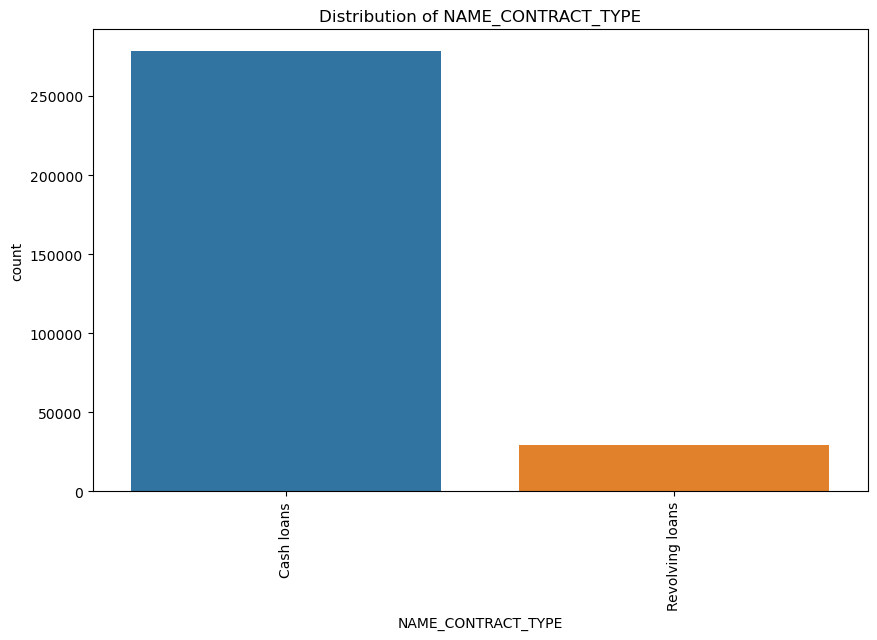

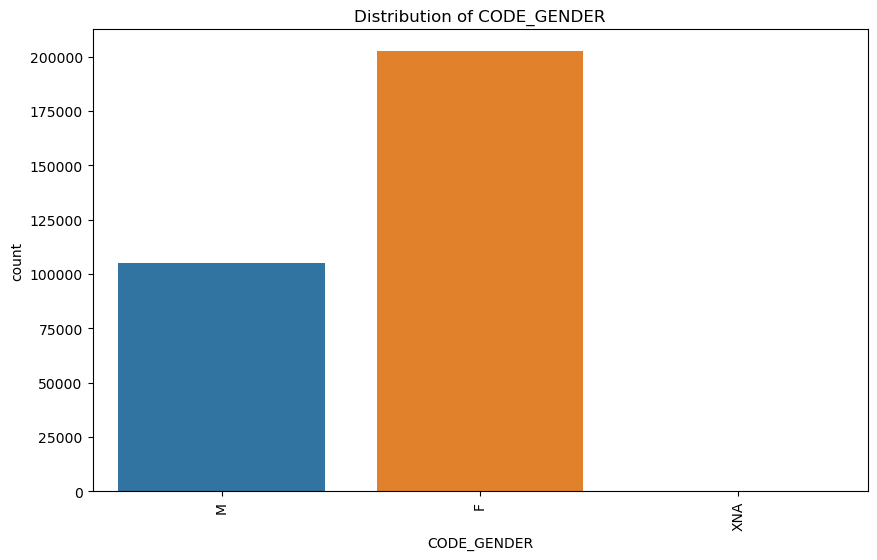

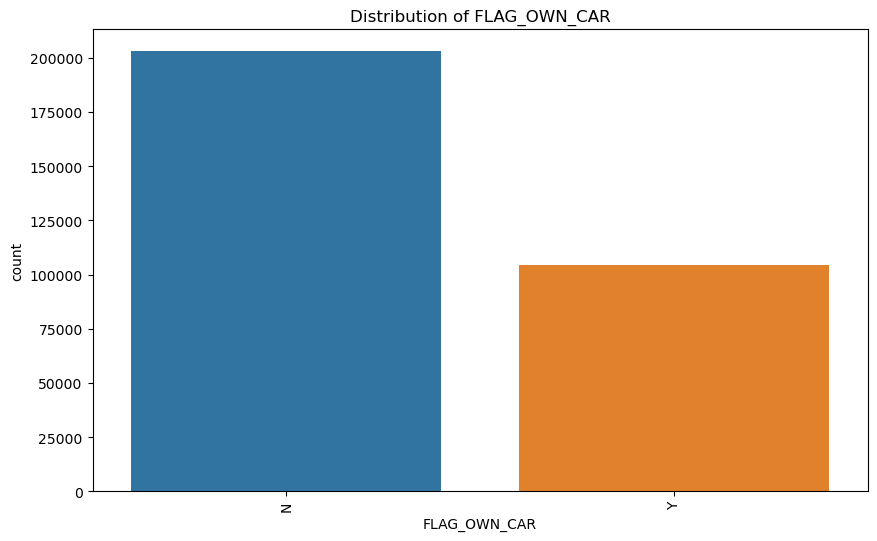

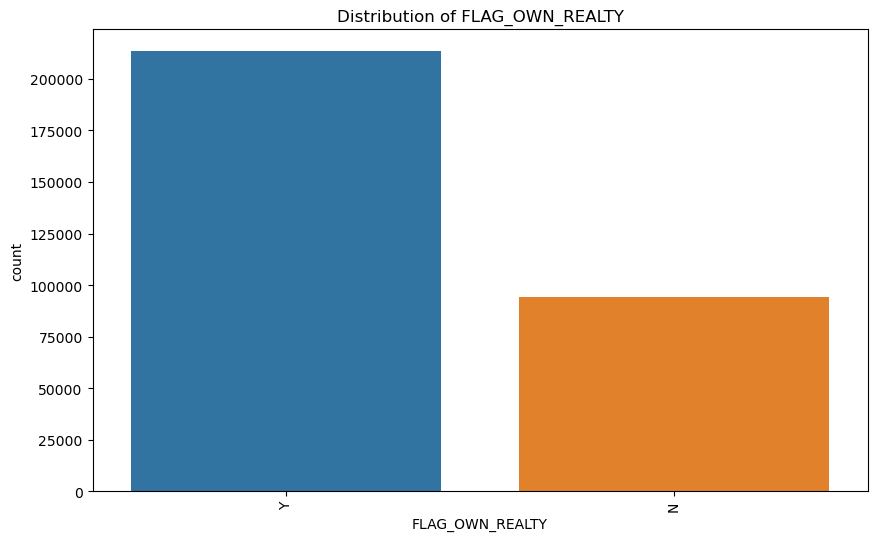

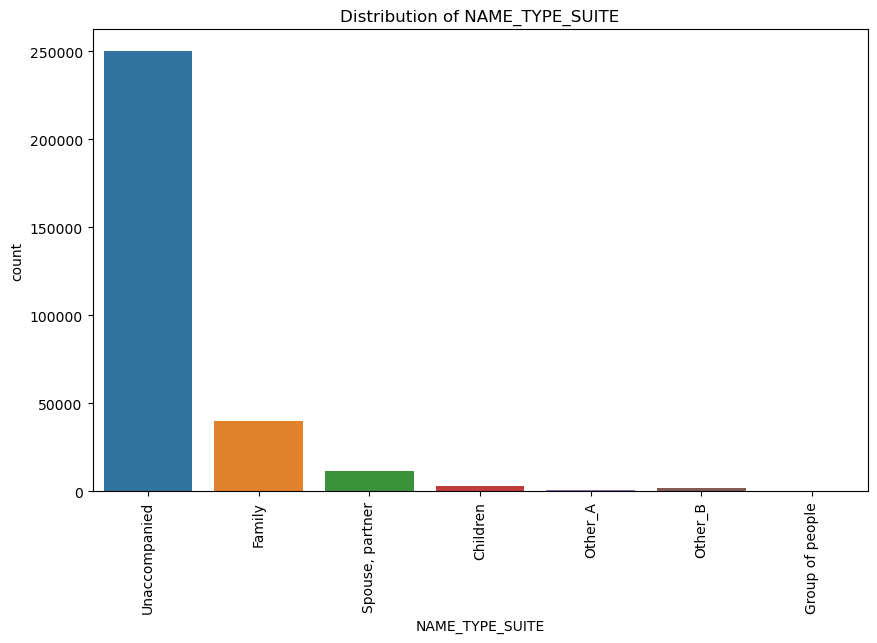

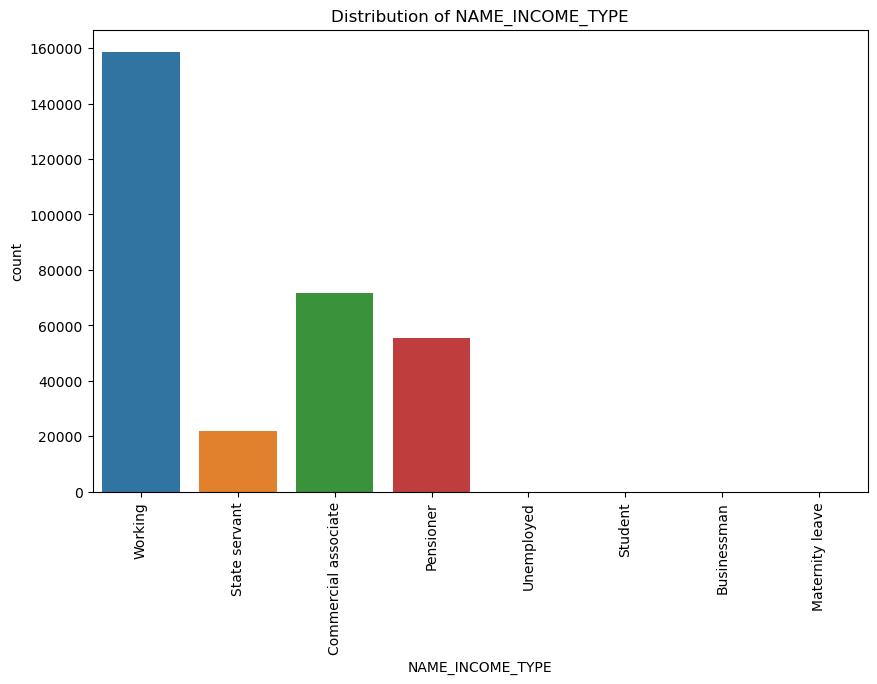

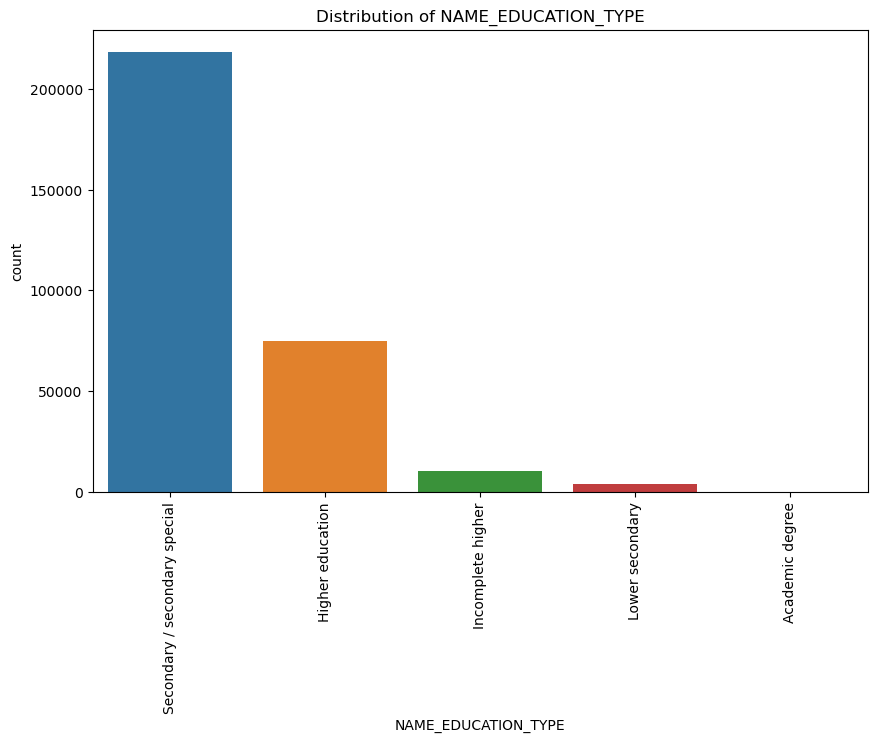

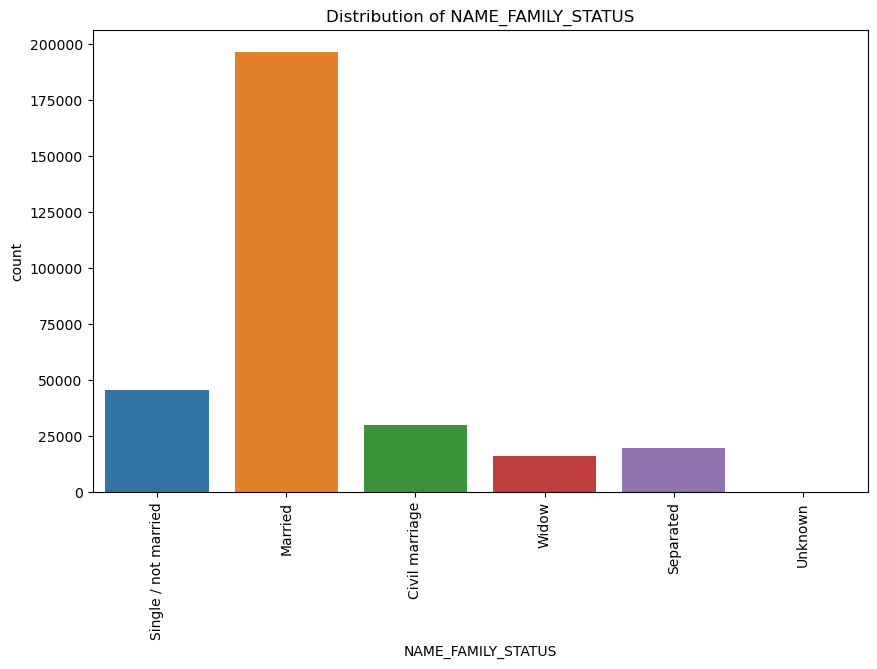

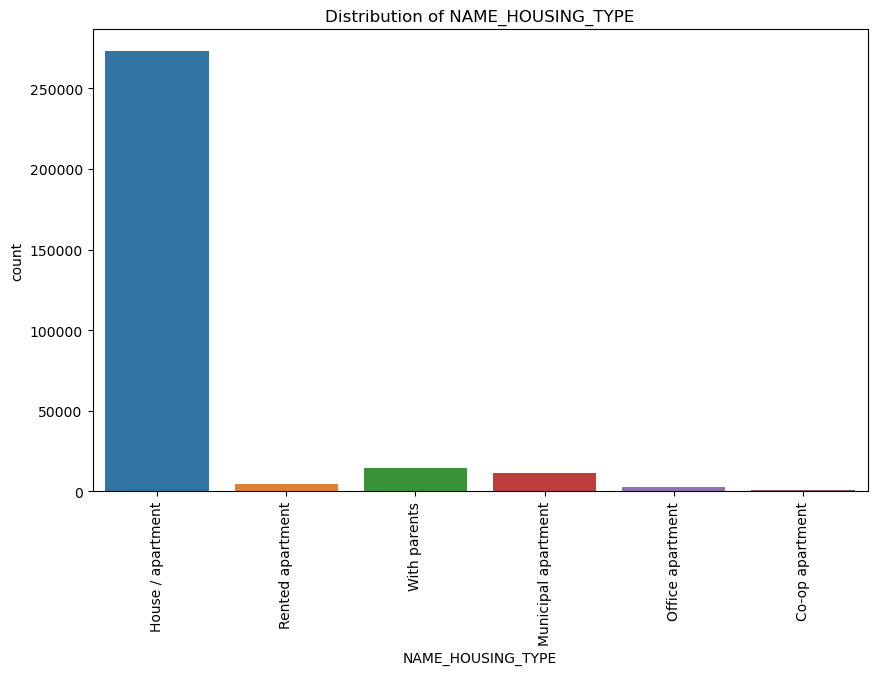

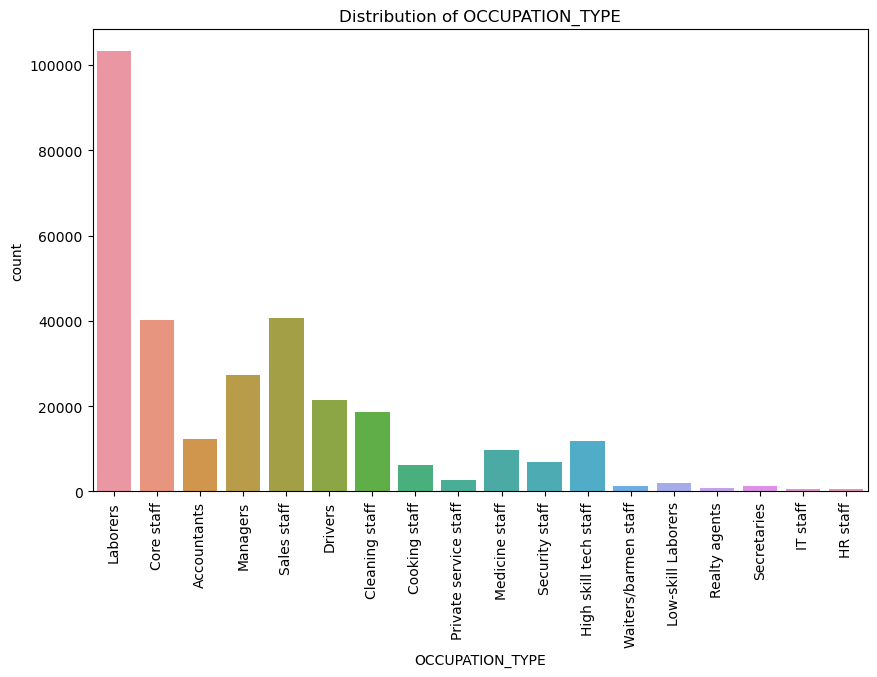

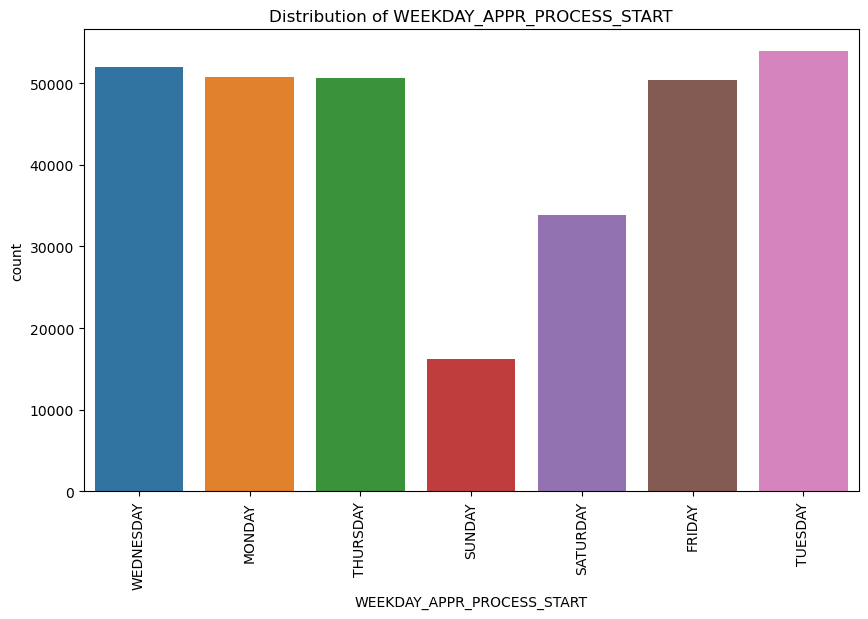

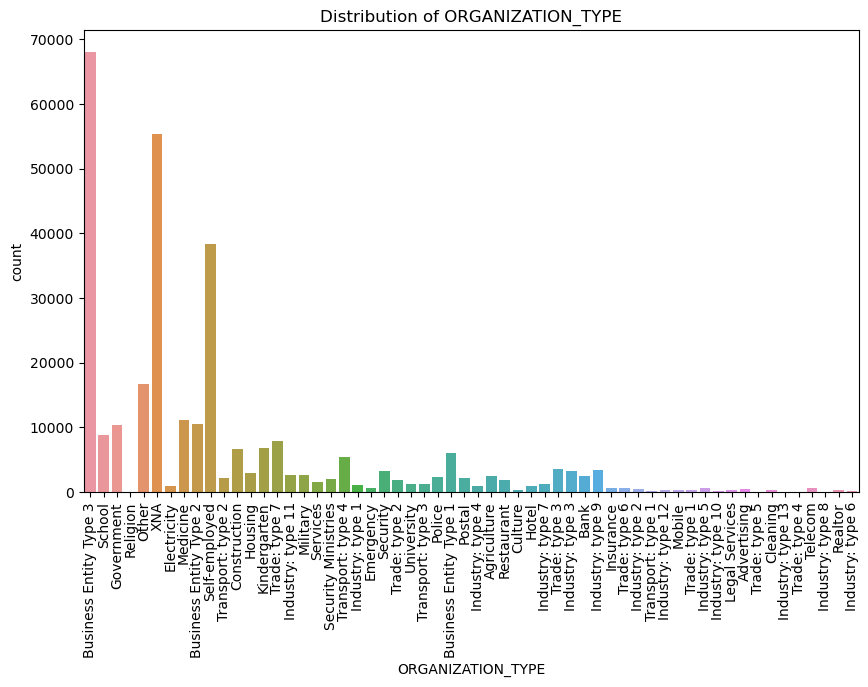

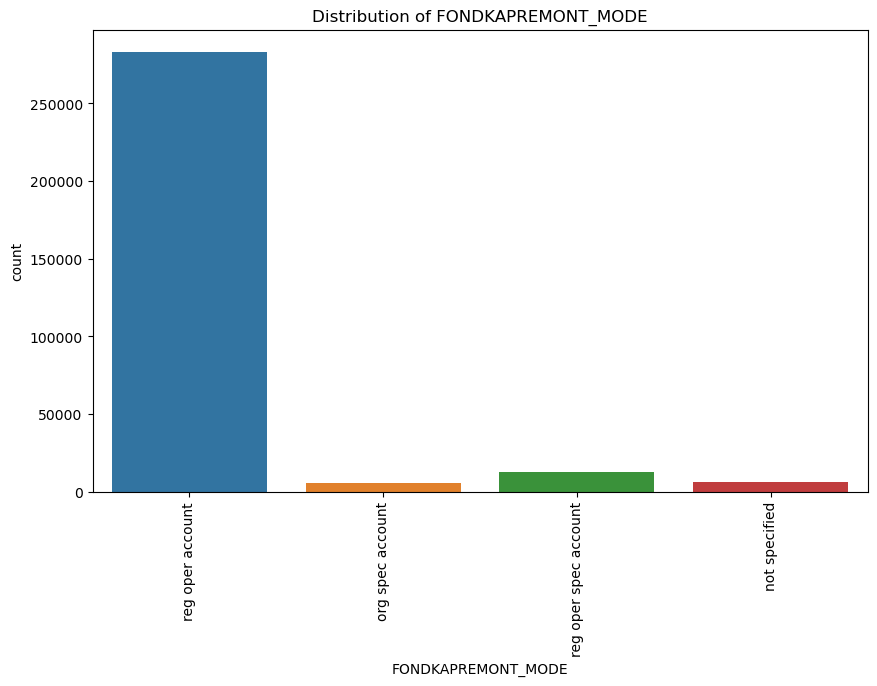

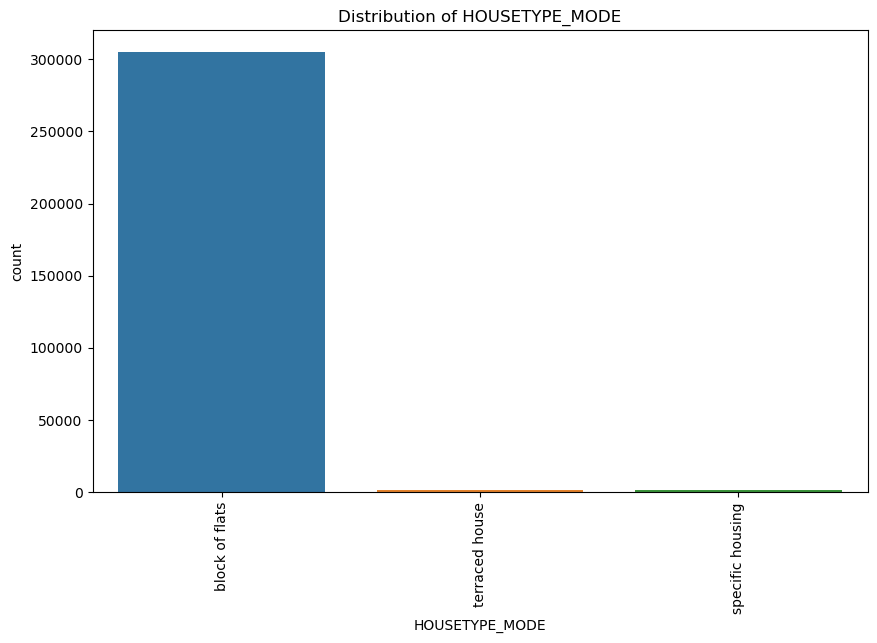

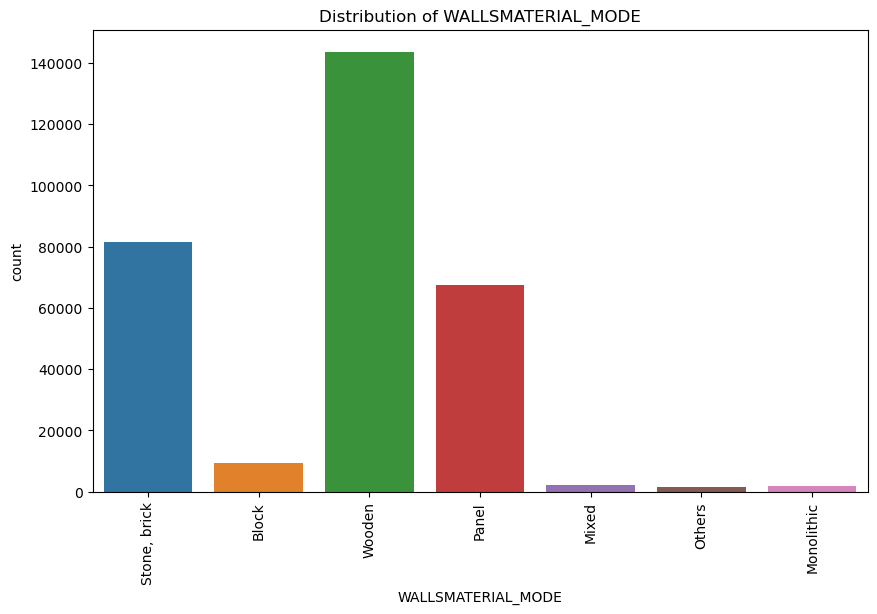

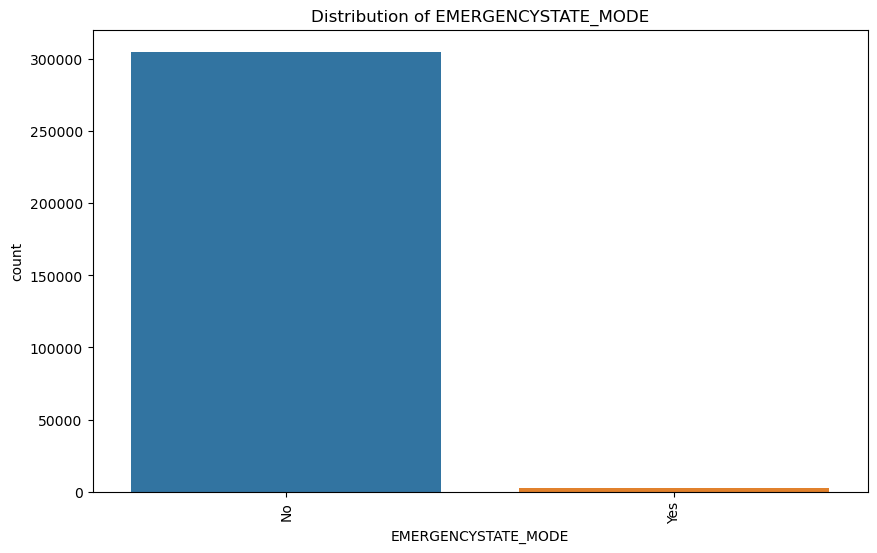

In [50]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    
    # Create a count plot for the current categorical column
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=categorical_and_id)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [51]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816